<a href="https://colab.research.google.com/github/fabiopedroza/Algoritmos/blob/main/Apto_Germany_data_mining_soluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apartamentos para alugar na Alemanha - Kaggle
## https://www.kaggle.com/corrieaar/apartment-rental-offers-in-germany

In [1]:
# Carregando as bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
# Carregando a base de dados
df = pd.read_csv('/content/immo_data.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,6,15,17,28,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6.0,4.62,10.0,840.0,1965.0,96107057.0,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4.0,ground_floor,44269.0,4.0,181.4,1.0,3.0,4.0,True,4.0,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8.0,3.47,10.0,NaN,1871.0,111378734.0,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5.0,ground_floor,67459.0,3.0,NaN,NaN,NaN,3.0,False,4.0,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8.0,2.72,2.4,1300.0,2019.0,113147523.0,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6.0,apartment,1097.0,3.0,NaN,3.0,4.0,3.0,False,4.0,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9.0,1.53,40.0,NaN,1964.0,108890903.0,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2.0,other,9599.0,3.0,86.0,3.0,NaN,3.0,False,2.0,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19.0,2.46,NaN,903.0,1950.0,114751222.0,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5.0,apartment,28213.0,3.0,188.9,1.0,NaN,3.0,False,4.0,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [7]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/immo_data.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,6,15,17,28,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6.0,4.62,10.0,840.0,1965.0,96107057.0,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4.0,ground_floor,44269.0,4.0,181.4,1.0,3.0,4.0,True,4.0,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8.0,3.47,10.0,NaN,1871.0,111378734.0,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5.0,ground_floor,67459.0,3.0,NaN,NaN,NaN,3.0,False,4.0,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8.0,2.72,2.4,1300.0,2019.0,113147523.0,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6.0,apartment,1097.0,3.0,NaN,3.0,4.0,3.0,False,4.0,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9.0,1.53,40.0,NaN,1964.0,108890903.0,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2.0,other,9599.0,3.0,86.0,3.0,NaN,3.0,False,2.0,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19.0,2.46,NaN,903.0,1950.0,114751222.0,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5.0,apartment,28213.0,3.0,188.9,1.0,NaN,3.0,False,4.0,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


## Analisando as informações e dados

In [8]:
# Informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256412 entries, 0 to 256411
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    256412 non-null  object 
 1   serviceCharge             249839 non-null  float64
 2   heatingType               213590 non-null  object 
 3   telekomTvOffer            225263 non-null  object 
 4   telekomHybridUploadSpeed  43037 non-null   float64
 5   newlyConst                256411 non-null  object 
 6   balcony                   256411 non-null  object 
 7   picturecount              256411 non-null  float64
 8   pricetrend                254669 non-null  float64
 9   telekomUploadSpeed        224548 non-null  float64
 10  totalRent                 217840 non-null  float64
 11  yearConstructed           201943 non-null  float64
 12  scoutId                   256411 non-null  float64
 13  noParkSpaces              88609 non-null   f

In [10]:
# Dados estatíticos 
df.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,249839.000000,43037.0,256411.000000,254669.000000,224548.000000,2.178400e+05,201943.000000,2.564110e+05,88609.000000,201943.000000,2.564110e+05,256411.000000,256411.000000,256411.000000,256411.000000,154856.000000,207507.000000,163219.000000,256411.000000,256411.000000,81631.000000,77023.000000,44512.000000,44512.000000
mean,151.094549,10.0,9.786842,3.384107,28.792394,9.001181e+02,1966.358859,1.069518e+08,1.334718,3.711379,6.526186e+02,74.366028,3.759827,37220.368050,2.641046,114.741403,2.124786,3.571441,2.570990,3.068925,77.085515,2013.892318,89.110228,0.199785
std,314.474894,0.0,6.408899,1.965750,16.342806,3.396183e+04,47.012331,1.250900e+07,8.558239,2.736849,2.513136e+03,260.772024,2.214557,27791.126402,2.683732,61.543187,3.686591,6.231449,0.937355,1.406627,150.934535,11.107178,5.400834,0.009677
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,0.000000e+00,0.000000,1.000000,852.000000,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,1.980000,10.000000,4.687250e+02,1950.000000,1.066786e+08,1.000000,1.000000,3.370000e+02,54.000000,2.000000,9127.000000,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.490000e+02,1972.000000,1.111518e+08,1.000000,3.000000,4.900000e+02,67.230000,3.000000,38640.000000,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.800000e+02,1996.000000,1.137658e+08,1.000000,5.000000,7.980000e+02,86.890000,5.000000,57072.000000,3.000000,140.200000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,1.234567e+06,111111.000000,9.000000,99998.000000,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


# delete columns with more than 50% null data

In [11]:
df.isna().sum()/len(df)

regio1                      0.000000
serviceCharge               0.025635
heatingType                 0.167005
telekomTvOffer              0.121480
telekomHybridUploadSpeed    0.832157
newlyConst                  0.000004
balcony                     0.000004
picturecount                0.000004
pricetrend                  0.006798
telekomUploadSpeed          0.124269
totalRent                   0.150430
yearConstructed             0.212428
scoutId                     0.000004
noParkSpaces                0.654427
firingTypes                 0.211928
hasKitchen                  0.000004
geo_bln                     0.000004
cellar                      0.000004
yearConstructedRange        0.212428
baseRent                    0.000004
houseNumber                 0.263822
livingSpace                 0.000004
geo_krs                     0.000004
condition                   0.254785
interiorQual                0.419033
petsAllowed                 0.426045
street                      0.000004
s

In [12]:
# number of null in each columns
# números de nulos em cada coluna
df.columns[((df.isna().sum()/len(df)) > 0.50)]

Index(['telekomHybridUploadSpeed', 'noParkSpaces', 'heatingCosts',
       'energyEfficiencyClass', 'lastRefurbish', 'electricityBasePrice',
       'electricityKwhPrice'],
      dtype='object')

In [15]:
# Drop / deleta as colunas que tem mais de 50% com null
df = df.drop(columns=df.columns[((df.isna().sum()/len(df)) > 0.50)])
df.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'newlyConst', 'balcony', 'picturecount', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'scoutId',
       'firingTypes', 'hasKitchen', 'geo_bln', 'cellar',
       'yearConstructedRange', 'baseRent', 'houseNumber', 'livingSpace',
       'geo_krs', 'condition', 'interiorQual', 'petsAllowed', 'street',
       'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat', 'geo_plz',
       'noRooms', 'thermalChar', 'floor', 'numberOfFloors', 'noRoomsRange',
       'garden', 'livingSpaceRange', 'regio2', 'regio3', 'description',
       'facilities', 'date'],
      dtype='object')

In [16]:
# Verificando como ficou após deletar/dropar as colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256412 entries, 0 to 256411
Data columns (total 42 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   regio1                256412 non-null  object 
 1   serviceCharge         249839 non-null  float64
 2   heatingType           213590 non-null  object 
 3   telekomTvOffer        225263 non-null  object 
 4   newlyConst            256411 non-null  object 
 5   balcony               256411 non-null  object 
 6   picturecount          256411 non-null  float64
 7   pricetrend            254669 non-null  float64
 8   telekomUploadSpeed    224548 non-null  float64
 9   totalRent             217840 non-null  float64
 10  yearConstructed       201943 non-null  float64
 11  scoutId               256411 non-null  float64
 12  firingTypes           202071 non-null  object 
 13  hasKitchen            256411 non-null  object 
 14  geo_bln               256411 non-null  object 
 15  

In [17]:
# Verificando como ficou após deletar/dropar as colunas
df.describe()

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange
count,249839.000000,256411.000000,254669.000000,224548.000000,2.178400e+05,201943.000000,2.564110e+05,201943.000000,2.564110e+05,256411.000000,256411.000000,256411.000000,256411.000000,154856.000000,207507.000000,163219.000000,256411.000000,256411.000000
mean,151.094549,9.786842,3.384107,28.792394,9.001181e+02,1966.358859,1.069518e+08,3.711379,6.526186e+02,74.366028,3.759827,37220.368050,2.641046,114.741403,2.124786,3.571441,2.570990,3.068925
std,314.474894,6.408899,1.965750,16.342806,3.396183e+04,47.012331,1.250900e+07,2.736849,2.513136e+03,260.772024,2.214557,27791.126402,2.683732,61.543187,3.686591,6.231449,0.937355,1.406627
min,0.000000,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,1.000000,0.000000e+00,0.000000,1.000000,852.000000,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000
25%,95.000000,6.000000,1.980000,10.000000,4.687250e+02,1950.000000,1.066786e+08,1.000000,3.370000e+02,54.000000,2.000000,9127.000000,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000
50%,135.000000,9.000000,3.390000,40.000000,6.490000e+02,1972.000000,1.111518e+08,3.000000,4.900000e+02,67.230000,3.000000,38640.000000,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000
75%,190.000000,13.000000,4.570000,40.000000,9.800000e+02,1996.000000,1.137658e+08,5.000000,7.980000e+02,86.890000,5.000000,57072.000000,3.000000,140.200000,3.000000,4.000000,3.000000,4.000000
max,146118.000000,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,9.000000,1.234567e+06,111111.000000,9.000000,99998.000000,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000


# delete columns with not appropriate value
# Apaga coluna com conteúdo/valor não apropriado

In [18]:
df[df['livingSpace'] == 0.0].shape[0]

73

In [19]:
df[df['livingSpace'] == 0.0].index

Int64Index([  3444,   6601,  11127,  15014,  17278,  18433,  20165,  27339,
             30124,  30982,  33083,  33595,  34612,  35630,  40629,  63174,
             67648,  69577,  70482,  71569,  75213,  77146,  77381,  78489,
             86437,  91491,  92982,  93073,  94343,  97255, 106586, 115056,
            115921, 119028, 119150, 119711, 120544, 120972, 124278, 132002,
            135088, 137334, 138819, 140420, 141794, 142114, 145902, 151681,
            153600, 162195, 165063, 169929, 175135, 182693, 186918, 187186,
            195037, 199402, 203713, 208913, 213220, 219914, 223897, 228138,
            228960, 229099, 231174, 232236, 238489, 243369, 247111, 248599,
            254055],
           dtype='int64')

In [20]:
df.shape

(256412, 42)

In [21]:
df = df.drop(df[df['livingSpace'] == 0.0].index)
df.shape

(256339, 42)

In [22]:
df[df['totalRent'] == 0.0].shape[0]

224

In [23]:
df.shape

(256339, 42)

In [24]:
df = df.drop(df[df['totalRent'] == 0.0].index)
df.shape

(256115, 42)

In [25]:
df.shape

(256115, 42)

# delete columns without useful information
  # Apaga colunas sem informações úteis

In [27]:
df.head(3)

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,date
0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,False,False,6.0,4.62,10.0,840.0,1965.0,96107057.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.0,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4.0,ground_floor,44269.0,4.0,181.4,1.0,3.0,4.0,True,4.0,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,May19
1,Rheinland_Pfalz,134.0,self_contained_central_heating,ONE_YEAR_FREE,False,True,8.0,3.47,10.0,NaN,1871.0,111378734.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.0,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5.0,ground_floor,67459.0,3.0,NaN,NaN,NaN,3.0,False,4.0,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,May19
2,Sachsen,255.0,floor_heating,ONE_YEAR_FREE,True,True,8.0,2.72,2.4,1300.0,2019.0,113147523.0,NaN,False,Sachsen,True,9.0,965.0,4,83.8,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6.0,apartment,1097.0,3.0,NaN,3.0,4.0,3.0,False,4.0,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",Oct19


In [28]:
df['date'].value_counts()

Feb20    75530
May19    72431
Oct19    63704
Sep18    44449
Name: date, dtype: int64

In [29]:
df = df.drop(columns=['facilities','description','livingSpaceRange','scoutId','street','streetPlain','houseNumber','date'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256115 entries, 0 to 256411
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   regio1                256115 non-null  object 
 1   serviceCharge         249566 non-null  float64
 2   heatingType           213321 non-null  object 
 3   telekomTvOffer        225005 non-null  object 
 4   newlyConst            256114 non-null  object 
 5   balcony               256114 non-null  object 
 6   picturecount          256114 non-null  float64
 7   pricetrend            254372 non-null  float64
 8   telekomUploadSpeed    224291 non-null  float64
 9   totalRent             217560 non-null  float64
 10  yearConstructed       201703 non-null  float64
 11  firingTypes           201822 non-null  object 
 12  hasKitchen            256114 non-null  object 
 13  geo_bln               256114 non-null  object 
 14  cellar                256114 non-null  object 
 15  

In [32]:
df.shape

(256115, 34)

# fillna numeric data by mean
# Preencher as colunas numericas média

In [33]:
df._get_numeric_data().mean()

serviceCharge             151.115781
picturecount                9.786029
pricetrend                  3.385155
telekomUploadSpeed         28.795537
totalRent                 901.065989
yearConstructed          1966.369737
yearConstructedRange        3.712315
baseRent                  652.842372
livingSpace                74.389392
baseRentRange               3.761028
geo_plz                 37224.911719
noRooms                     2.640907
thermalChar               114.717031
floor                       2.125189
numberOfFloors              3.573660
noRoomsRange                2.570929
dtype: float64

In [34]:
df.fillna(df._get_numeric_data().mean(),inplace = True)

In [35]:
df.isna().sum()

regio1                       0
serviceCharge                0
heatingType              42794
telekomTvOffer           31110
newlyConst                   1
balcony                      1
picturecount                 0
pricetrend                   0
telekomUploadSpeed           0
totalRent                    0
yearConstructed              0
firingTypes              54293
hasKitchen                   1
geo_bln                      1
cellar                       1
yearConstructedRange         0
baseRent                     0
livingSpace                  0
geo_krs                      1
condition                65177
interiorQual            107273
petsAllowed             109073
lift                         1
baseRentRange                0
typeOfFlat               34998
geo_plz                      0
noRooms                      0
thermalChar                  0
floor                        0
numberOfFloors               0
noRoomsRange                 0
garden                       1
regio2  

# delete outlier

In [36]:
for cols in df.columns:
    print(df[cols].dtype)

object
float64
object
object
object
object
float64
float64
float64
float64
float64
object
object
object
object
float64
float64
float64
object
object
object
object
object
float64
object
float64
float64
float64
float64
float64
float64
object
object
object


In [37]:
print('col mean : ' ,df['serviceCharge'].mean())
print('col std : ' ,df['serviceCharge'].std())

upper_range = df['serviceCharge'].mean() + 3 * df['serviceCharge'].std()
print('upper range : ',upper_range)
lower_range = df['serviceCharge'].mean() - 3 * df['serviceCharge'].std()
print('lower range : ',lower_range)

col mean :  151.11578119614225
col std :  310.5844373424705
upper range :  1082.8690932235538
lower range :  -780.6375308312693


In [38]:
df[(df['serviceCharge'] > upper_range) | (df['serviceCharge'] < lower_range)]

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,livingSpace,geo_krs,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,regio2,regio3
1311,Hessen,1150.00,central_heating,ONE_YEAR_FREE,False,False,8.0,4.07,40.000000,200.000000,1966.369737,natural_gas_light,False,Hessen,False,3.712315,950.00,120.00,Main_Taunus_Kreis,well_kept,normal,no,False,6.0,maisonette,65439.0,4.0,166.800000,2.125189,3.00000,4.0,False,Main_Taunus_Kreis,Flörsheim_am_Main
1648,Hessen,1200.00,central_heating,ONE_YEAR_FREE,True,True,3.0,5.10,40.000000,901.065989,2019.000000,gas,True,Hessen,True,9.000000,10000.00,440.00,Frankfurt_am_Main,first_time_use,luxury,negotiable,True,9.0,apartment,60487.0,8.5,114.717031,1.000000,4.00000,5.0,False,Frankfurt_am_Main,Bockenheim
4733,Berlin,1290.00,floor_heating,ONE_YEAR_FREE,False,True,22.0,5.91,40.000000,5705.000000,2011.000000,district_heating,True,Berlin,True,8.000000,4415.00,260.00,Berlin,mint_condition,NaN,NaN,True,9.0,other,10117.0,3.0,63.800000,2.125189,7.00000,3.0,False,Berlin,Mitte_Mitte
14123,Hessen,1400.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,2.0,5.13,40.000000,13400.000000,1900.000000,gas,False,Hessen,False,1.000000,12000.00,600.00,Frankfurt_am_Main,negotiable,luxury,negotiable,True,9.0,maisonette,60322.0,15.0,114.717031,4.000000,5.00000,5.0,False,Frankfurt_am_Main,Westend_Nord
14591,Berlin,2150.00,central_heating,NaN,False,True,25.0,6.22,28.795537,6985.000000,2010.000000,NaN,True,Berlin,True,7.000000,4835.00,310.00,Berlin,mint_condition,NaN,NaN,True,9.0,apartment,10117.0,5.0,63.800000,0.000000,7.00000,5.0,False,Berlin,Mitte_Mitte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246742,Berlin,1291.22,NaN,ONE_YEAR_FREE,False,False,8.0,6.78,40.000000,7552.020000,1986.000000,NaN,False,Berlin,False,4.000000,6260.80,542.53,Berlin,modernized,luxury,negotiable,False,9.0,NaN,14193.0,5.0,114.717031,2.125189,2.00000,5.0,False,Berlin,Grunewald_Wilmersdorf
249519,Berlin,1222.50,NaN,ONE_YEAR_FREE,False,True,28.0,5.91,10.000000,3997.580000,2001.000000,natural_gas_heavy,True,Berlin,False,6.000000,2775.08,244.50,Berlin,refurbished,sophisticated,negotiable,True,9.0,apartment,10117.0,3.0,108.000000,6.000000,7.00000,3.0,False,Berlin,Mitte_Mitte
250558,Bayern,2685.00,NaN,ONE_YEAR_FREE,False,True,14.0,7.43,40.000000,20466.120000,2015.000000,NaN,True,Bayern,False,8.000000,17781.12,362.88,München,NaN,NaN,NaN,True,9.0,NaN,80539.0,5.0,114.717031,2.125189,3.57366,5.0,False,München,Maxvorstadt
251160,Berlin,1505.00,central_heating,ONE_YEAR_FREE,False,True,12.0,8.55,40.000000,6951.000000,2010.000000,NaN,True,Berlin,True,7.000000,5446.00,303.00,Berlin,mint_condition,NaN,NaN,True,9.0,apartment,10117.0,4.0,63.800000,7.000000,7.00000,4.0,False,Berlin,Mitte_Mitte


In [39]:
df.shape

(256115, 34)

In [40]:
for cols in df.columns:
    if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
        upper_range = df[cols].mean() + 3 * df[cols].std()
        lower_range = df[cols].mean() - 3 * df[cols].std()
        
        indexs = df[(df[cols] > upper_range) | (df[cols] < lower_range)].index
        df = df.drop(indexs)

In [41]:
df.shape

(243275, 34)

# fillna categorical data
# Preencher as colunas de data



In [42]:
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        print('column : ',cols)
        print(df[cols].value_counts().head(1))

column :  regio1
Nordrhein_Westfalen    57301
Name: regio1, dtype: int64
column :  heatingType
central_heating    117239
Name: heatingType, dtype: int64
column :  telekomTvOffer
ONE_YEAR_FREE    205890
Name: telekomTvOffer, dtype: int64
column :  newlyConst
False    224478
Name: newlyConst, dtype: int64
column :  balcony
True    149124
Name: balcony, dtype: int64
column :  firingTypes
gas    100506
Name: firingTypes, dtype: int64
column :  hasKitchen
False    162181
Name: hasKitchen, dtype: int64
column :  geo_bln
Nordrhein_Westfalen    57300
Name: geo_bln, dtype: int64
column :  cellar
True    156141
Name: cellar, dtype: int64
column :  geo_krs
Leipzig    12772
Name: geo_krs, dtype: int64
column :  condition
well_kept    61132
Name: condition, dtype: int64
column :  interiorQual
normal    75689
Name: interiorQual, dtype: int64
column :  petsAllowed
negotiable    83388
Name: petsAllowed, dtype: int64
column :  lift
False    187864
Name: lift, dtype: int64
column :  typeOfFlat
apartment

In [43]:
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        print(df[cols].value_counts().head(1).index[0])

Nordrhein_Westfalen
central_heating
ONE_YEAR_FREE
False
True
gas
False
Nordrhein_Westfalen
True
Leipzig
well_kept
normal
negotiable
False
apartment
False
Leipzig
Innenstadt


In [44]:
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        print('cols : {} , value : {}'.format(cols , df[cols].value_counts().head(1).index[0]))
        df[cols].fillna(df[cols].value_counts().head(1).index[0],inplace = True)

cols : regio1 , value : Nordrhein_Westfalen
cols : heatingType , value : central_heating
cols : telekomTvOffer , value : ONE_YEAR_FREE
cols : newlyConst , value : False
cols : balcony , value : True
cols : firingTypes , value : gas
cols : hasKitchen , value : False
cols : geo_bln , value : Nordrhein_Westfalen
cols : cellar , value : True
cols : geo_krs , value : Leipzig
cols : condition , value : well_kept
cols : interiorQual , value : normal
cols : petsAllowed , value : negotiable
cols : lift , value : False
cols : typeOfFlat , value : apartment
cols : garden , value : False
cols : regio2 , value : Leipzig
cols : regio3 , value : Innenstadt


In [45]:
df.isna().sum()

regio1                  0
serviceCharge           0
heatingType             0
telekomTvOffer          0
newlyConst              0
balcony                 0
picturecount            0
pricetrend              0
telekomUploadSpeed      0
totalRent               0
yearConstructed         0
firingTypes             0
hasKitchen              0
geo_bln                 0
cellar                  0
yearConstructedRange    0
baseRent                0
livingSpace             0
geo_krs                 0
condition               0
interiorQual            0
petsAllowed             0
lift                    0
baseRentRange           0
typeOfFlat              0
geo_plz                 0
noRooms                 0
thermalChar             0
floor                   0
numberOfFloors          0
noRoomsRange            0
garden                  0
regio2                  0
regio3                  0
dtype: int64

# delete categorical features with lots of states

In [49]:
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        print('cols : {} , unique values : {}'.format(cols,df[cols].nunique()))

cols : regio1 , unique values : 16
cols : heatingType , unique values : 14
cols : telekomTvOffer , unique values : 3
cols : newlyConst , unique values : 2
cols : balcony , unique values : 2
cols : hasKitchen , unique values : 2
cols : cellar , unique values : 2
cols : condition , unique values : 10
cols : interiorQual , unique values : 4
cols : petsAllowed , unique values : 3
cols : lift , unique values : 2
cols : typeOfFlat , unique values : 10
cols : garden , unique values : 2


In [50]:
df = df.drop(columns=['firingTypes','geo_krs','regio2','regio3','geo_bln'])
df.shape

KeyError: ignored

# reduce number of categories

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243275 entries, 0 to 256411
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   regio1                243275 non-null  object 
 1   serviceCharge         243275 non-null  float64
 2   heatingType           243275 non-null  object 
 3   telekomTvOffer        243275 non-null  object 
 4   newlyConst            243275 non-null  bool   
 5   balcony               243275 non-null  bool   
 6   picturecount          243275 non-null  float64
 7   pricetrend            243275 non-null  float64
 8   telekomUploadSpeed    243275 non-null  float64
 9   totalRent             243275 non-null  float64
 10  yearConstructed       243275 non-null  float64
 11  hasKitchen            243275 non-null  bool   
 12  cellar                243275 non-null  bool   
 13  yearConstructedRange  243275 non-null  float64
 14  baseRent              243275 non-null  float64
 15  

In [52]:
df['regio1'].value_counts()*100/len(df)

Nordrhein_Westfalen       23.554003
Sachsen                   22.288357
Sachsen_Anhalt             7.789539
Bayern                     7.704861
Hessen                     6.461412
Niedersachsen              6.257527
Baden_Württemberg          5.932381
Thüringen                  3.244887
Rheinland_Pfalz            3.161443
Berlin                     2.894255
Brandenburg                2.657075
Mecklenburg_Vorpommern     2.546912
Schleswig_Holstein         2.508273
Hamburg                    1.331826
Bremen                     1.132874
Saarland                   0.534375
Name: regio1, dtype: float64

In [55]:
def edit_regio1(x):
    if x in ['Hamburg','Bremen','Saarland']:
        return 'other'
    else:
        return x
    
df['regio1_edit'] = df['regio1'].apply(edit_regio1)
df = df.drop(columns = ['regio1'])

KeyError: ignored

In [56]:
df['regio1_edit'].value_counts()*100/len(df)

Nordrhein_Westfalen       23.554003
Sachsen                   22.288357
Sachsen_Anhalt             7.789539
Bayern                     7.704861
Hessen                     6.461412
Niedersachsen              6.257527
Baden_Württemberg          5.932381
Thüringen                  3.244887
Rheinland_Pfalz            3.161443
other                      2.999075
Berlin                     2.894255
Brandenburg                2.657075
Mecklenburg_Vorpommern     2.546912
Schleswig_Holstein         2.508273
Name: regio1_edit, dtype: float64

In [57]:
df['heatingType'].value_counts()*100 / len(df)

central_heating                   64.996403
district_heating                   9.277978
gas_heating                        7.443428
self_contained_central_heating     6.939883
floor_heating                      6.330285
oil_heating                        1.876888
heat_pump                          1.019834
combined_heat_and_power_plant      0.733738
night_storage_heater               0.505190
wood_pellet_heating                0.355976
electric_heating                   0.337067
stove_heating                      0.120851
solar_heating                      0.062070
self_contained_central_h           0.000411
Name: heatingType, dtype: float64

In [58]:
list(df['heatingType'].value_counts().tail(8).index)

['heat_pump',
 'combined_heat_and_power_plant',
 'night_storage_heater',
 'wood_pellet_heating',
 'electric_heating',
 'stove_heating',
 'solar_heating',
 'self_contained_central_h']

In [59]:
others = list(df['heatingType'].value_counts().tail(8).index)
def edit_heating(x):
    if x in others:
        return 'other'
    else:
        return x

df['heatingType_edit'] = df['heatingType'].apply(edit_heating)
df = df.drop(columns = ['heatingType'])
df['heatingType_edit'].value_counts()*100 / len(df)

central_heating                   64.996403
district_heating                   9.277978
gas_heating                        7.443428
self_contained_central_heating     6.939883
floor_heating                      6.330285
other                              3.135135
oil_heating                        1.876888
Name: heatingType_edit, dtype: float64

In [60]:
df['condition'].value_counts()

well_kept                             123265
refurbished                            24700
fully_renovated                        23975
first_time_use                         19403
mint_condition                         19146
modernized                             15624
first_time_use_after_refurbishment     13831
negotiable                              2073
need_of_renovation                      1254
ripe_for_demolition                        4
Name: condition, dtype: int64

In [61]:
list(df['condition'].value_counts().tail(4).index)

['first_time_use_after_refurbishment',
 'negotiable',
 'need_of_renovation',
 'ripe_for_demolition']

In [62]:
others = list(df['condition'].value_counts().tail(4).index)

def edit_condition(x):
    if x in others:
        return 'other'
    else:
        return x
    
df['condition_edit'] = df['condition'].apply(edit_condition)
df = df.drop(columns=['condition'])
df['condition_edit'].value_counts()

well_kept          123265
refurbished         24700
fully_renovated     23975
first_time_use      19403
mint_condition      19146
other               17162
modernized          15624
Name: condition_edit, dtype: int64

In [63]:
df['typeOfFlat'].value_counts()

apartment              152626
roof_storey             31720
ground_floor            28777
other                    8663
maisonette               7942
raised_ground_floor      5152
terraced_flat            2992
penthouse                2758
half_basement            1869
loft                      776
Name: typeOfFlat, dtype: int64

In [64]:
list(df['typeOfFlat'].value_counts().tail(2).index)

['half_basement', 'loft']

In [65]:
def edit_typeOfFlat(x):
    if x in ['half_basement', 'loft']:
        return 'half_loft'
    else:
        return x
    
df['typeOfFlat_edit'] = df['typeOfFlat'].apply(edit_typeOfFlat)
df = df.drop(columns=['typeOfFlat'])
df['typeOfFlat_edit'].value_counts()

apartment              152626
roof_storey             31720
ground_floor            28777
other                    8663
maisonette               7942
raised_ground_floor      5152
terraced_flat            2992
penthouse                2758
half_loft                2645
Name: typeOfFlat_edit, dtype: int64

In [ ]:
df.shape

# See DataSet and Visualization (extra)

In [66]:
df.columns

Index(['serviceCharge', 'telekomTvOffer', 'newlyConst', 'balcony',
       'picturecount', 'pricetrend', 'telekomUploadSpeed', 'totalRent',
       'yearConstructed', 'hasKitchen', 'cellar', 'yearConstructedRange',
       'baseRent', 'livingSpace', 'interiorQual', 'petsAllowed', 'lift',
       'baseRentRange', 'geo_plz', 'noRooms', 'thermalChar', 'floor',
       'numberOfFloors', 'noRoomsRange', 'garden', 'regio1_edit',
       'heatingType_edit', 'condition_edit', 'typeOfFlat_edit'],
      dtype='object')

In [67]:
df.shape

(243275, 29)

In [68]:
df['regio1_edit'].value_counts()

Nordrhein_Westfalen       57301
Sachsen                   54222
Sachsen_Anhalt            18950
Bayern                    18744
Hessen                    15719
Niedersachsen             15223
Baden_Württemberg         14432
Thüringen                  7894
Rheinland_Pfalz            7691
other                      7296
Berlin                     7041
Brandenburg                6464
Mecklenburg_Vorpommern     6196
Schleswig_Holstein         6102
Name: regio1_edit, dtype: int64

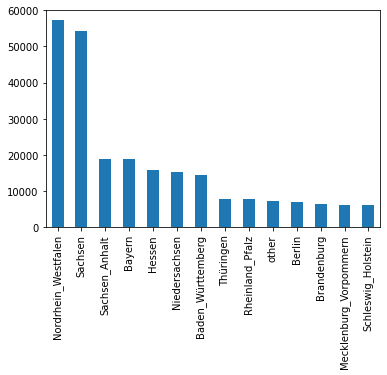

In [77]:
df['regio1_edit'].value_counts().plot(kind='bar' );

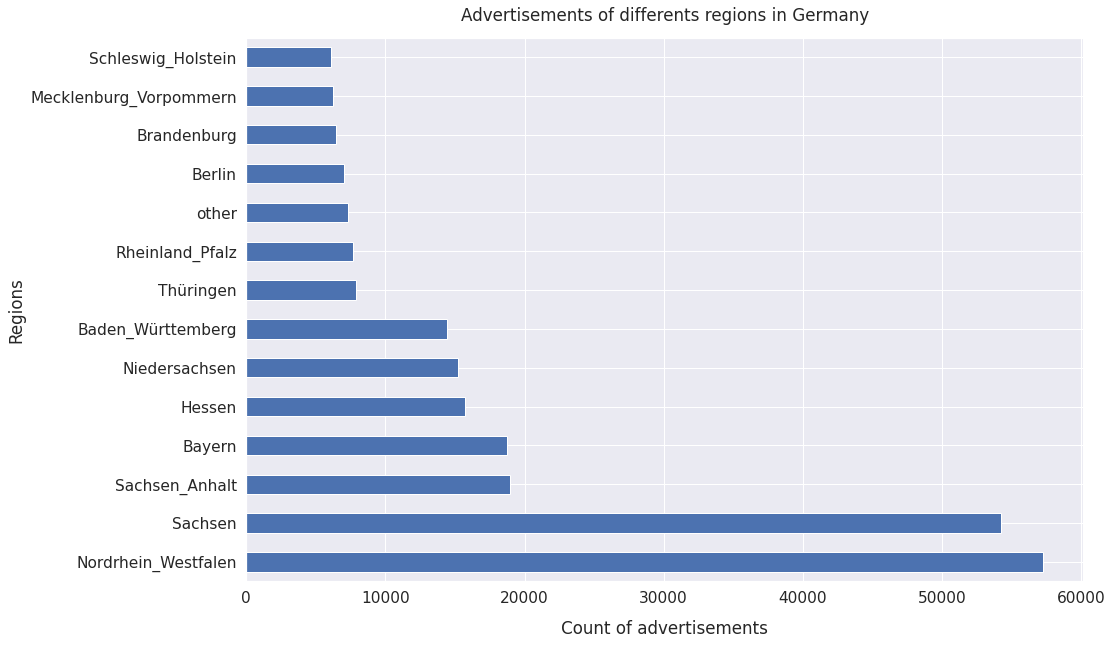

In [87]:
sns.set(font_scale=1.4)
df['regio1_edit'].value_counts().plot(kind='barh', figsize=(15, 10), rot=0)
plt.xlabel("Count of advertisements", labelpad=14)
plt.ylabel("Regions", labelpad=5)
plt.title("Advertisements of differents regions in Germany", y=1.02);

In [88]:
df.numberOfFloors.value_counts()

3.57366     89199
3.00000     46345
4.00000     36316
2.00000     33686
5.00000     17667
1.00000      7625
6.00000      5405
7.00000      2216
0.00000      1184
8.00000      1030
11.00000      901
10.00000      529
9.00000       468
14.00000      167
12.00000      155
13.00000      109
16.00000      104
15.00000       68
17.00000       62
18.00000       39
Name: numberOfFloors, dtype: int64

# Hypothesis Test
# Teste de hipótese 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


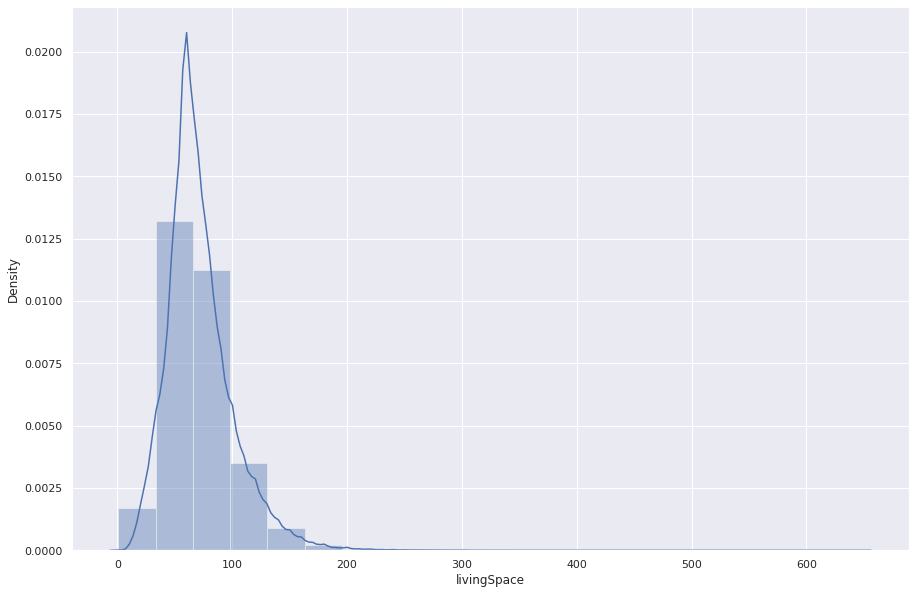

In [91]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(df['livingSpace'],kde_kws={"label": 'livingSpace'}, bins=20);

In [92]:
stats.normaltest(df["livingSpace"])

NormaltestResult(statistic=67110.61192900418, pvalue=0.0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


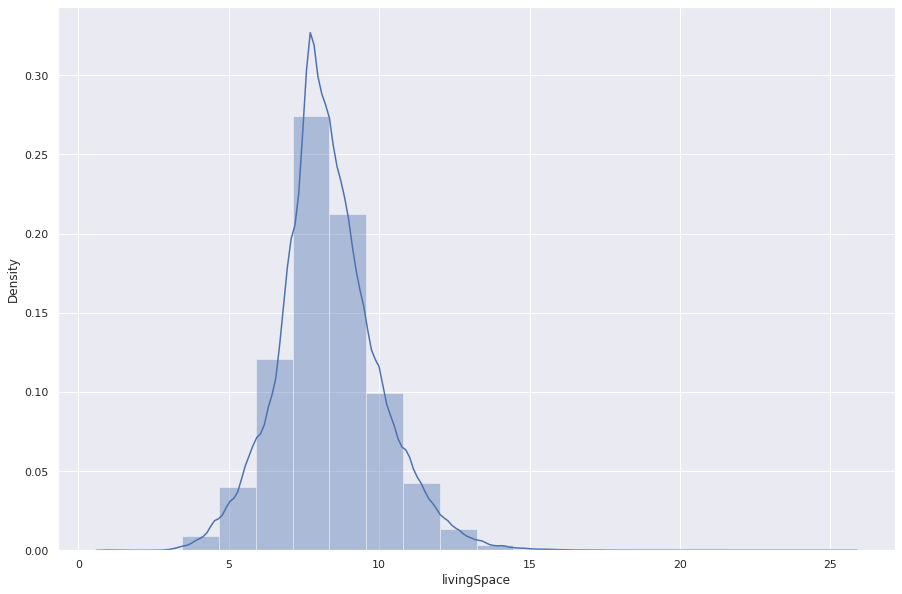

In [93]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(np.sqrt(df["livingSpace"]),kde_kws={"label": 'livingSpace'}, bins=20)

In [94]:
stats.normaltest(np.sqrt(df["livingSpace"]))

NormaltestResult(statistic=12271.69561211165, pvalue=0.0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


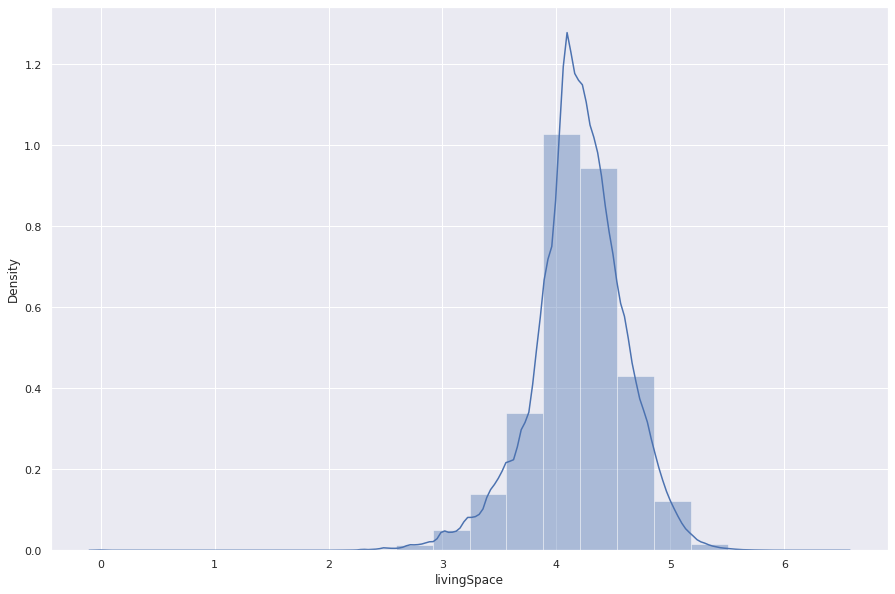

In [95]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(np.log(df["livingSpace"]),kde_kws={"label": 'livingSpace'}, bins=20)

In [96]:
stats.normaltest(np.log(df["livingSpace"]))

NormaltestResult(statistic=18807.49399571676, pvalue=0.0)

In [97]:
stats.normaltest(np.log10(df["livingSpace"]))

NormaltestResult(statistic=18807.493995717, pvalue=0.0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


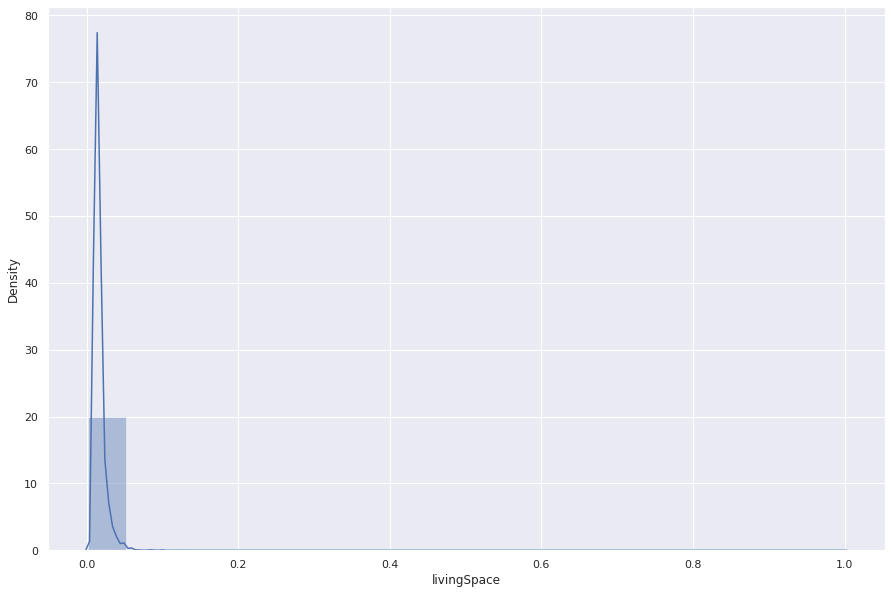

In [98]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(1/df["livingSpace"],kde_kws={"label": 'livingSpace'}, bins=20)

In [99]:
stats.normaltest(1/df["livingSpace"])

NormaltestResult(statistic=723083.464177725, pvalue=0.0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


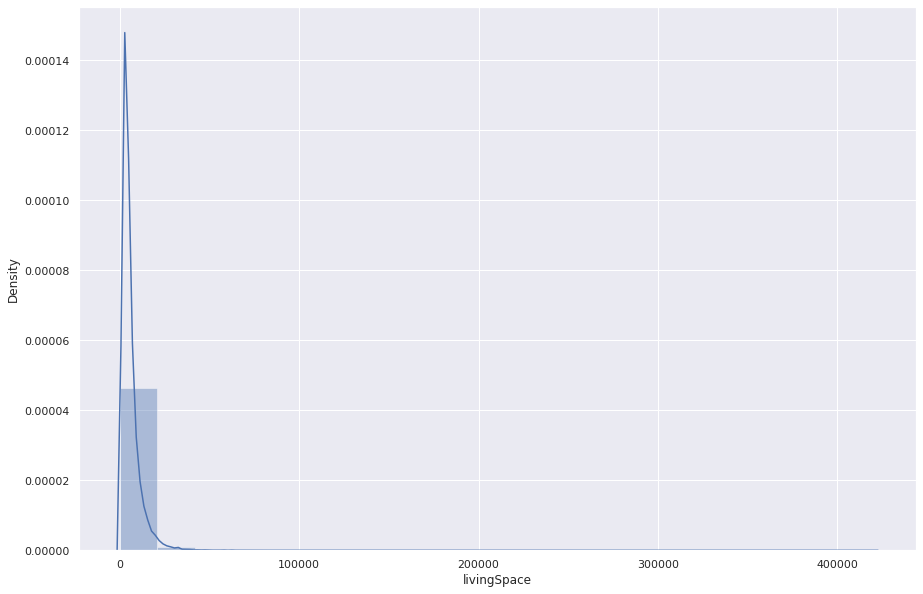

In [100]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(df["livingSpace"]**2,kde_kws={"label": 'livingSpace'}, bins=20)

In [101]:
stats.normaltest(df["livingSpace"]**2)

NormaltestResult(statistic=296520.2787653461, pvalue=0.0)

## Spearman’s Rank Correlation
## Correlação

In [102]:
# q1.relation between living Space and totalRent

stats.stats.spearmanr(df['livingSpace'],df['totalRent'])

SpearmanrResult(correlation=0.6620337077783168, pvalue=0.0)

## Analysis of Variance Test (ANOVA)

In [103]:
# q2.relation between region1 and totalRent

fstat, pval = stats.f_oneway(*[df.totalRent[df.regio1_edit == s]
for s in df.regio1_edit.unique()])
print("Oneway Anova totalRent ~ edit region1 F=%.2f, p-value=%E" % (fstat, pval))

Oneway Anova totalRent ~ edit region1 F=3757.89, p-value=0.000000E+00


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


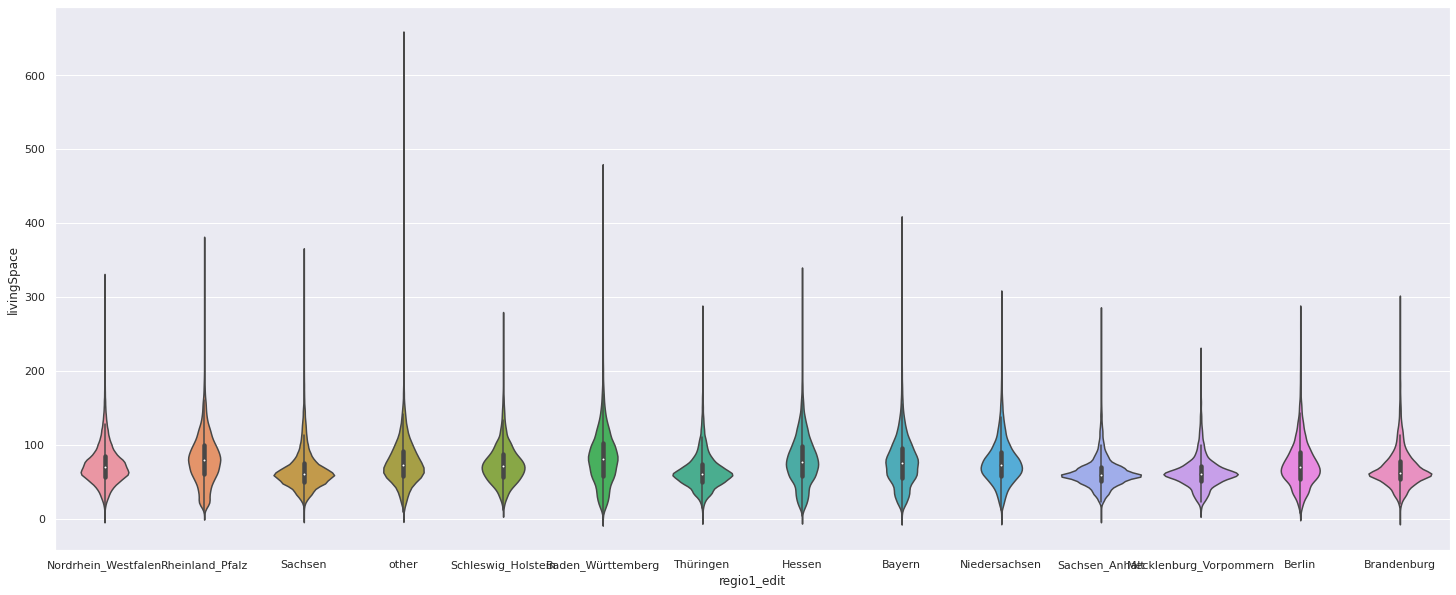

In [108]:
plt.figure(figsize=(25,10))
sns.violinplot("regio1_edit", "livingSpace", data=df);

## Chi-Squared Test

In [109]:
#q3  independence of having serviceCharge and havingKitchen

def edit(x):
    if x == 0.0:
        return 0
    else:
        return 1
    
df['has_serviceCharge'] = df['serviceCharge'].apply(edit)
stats.chi2_contingency(df[['has_serviceCharge',"livingSpace"]])

(44723.863016679825, 1.0, 243274, array([[ 1.18129172, 85.81870828],
        [ 1.22202591, 88.77797409],
        [ 1.15141997, 83.64858003],
        ...,
        [ 1.0536579 , 76.5463421 ],
        [ 1.00274015, 72.84725985],
        [ 1.02364212, 74.36574972]]))

## Point Biserialr test

In [110]:
#q4 realation between having serviceCharge and livingSpace

stats.pointbiserialr(df['has_serviceCharge'],df["livingSpace"])

PointbiserialrResult(correlation=0.06840159526240643, pvalue=4.285560389519909e-250)

In [111]:
del df['has_serviceCharge']

## t-test

In [112]:
#q5 in Berlin relation hasKitchen and totalRent
berlin_df = df[df['regio1_edit'] == 'Berlin']
berlin_df.head()

,serviceCharge,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,interiorQual,petsAllowed,lift,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,regio1_edit,heatingType_edit,condition_edit,typeOfFlat_edit
45,320.00,ONE_YEAR_FREE,False,True,10.0,4.99,28.795537,1140.00,1966.369737,True,False,3.712315,820.00,77.00,normal,negotiable,True,6.0,13591.0,3.0,114.717031,0.0,3.0,3.0,False,Berlin,central_heating,well_kept,ground_floor
61,79.00,ONE_YEAR_FREE,False,False,17.0,7.35,40.000000,955.00,1918.000000,False,False,1.000000,808.00,62.63,normal,negotiable,False,6.0,13086.0,2.0,100.400000,0.0,3.0,2.0,False,Berlin,central_heating,refurbished,ground_floor
77,150.00,ONE_YEAR_FREE,True,True,15.0,6.60,40.000000,1300.00,2019.000000,True,True,9.000000,1150.00,46.40,luxury,no,True,7.0,10179.0,2.0,114.717031,3.0,5.0,2.0,False,Berlin,floor_heating,first_time_use,apartment
86,228.78,ONE_YEAR_FREE,False,True,2.0,8.63,28.795537,1428.78,2017.000000,True,True,9.000000,1200.00,67.00,sophisticated,negotiable,True,7.0,10963.0,2.5,114.717031,6.0,7.0,2.0,False,Berlin,floor_heating,mint_condition,apartment
87,147.08,ONE_YEAR_FREE,True,True,9.0,7.56,40.000000,1559.05,2019.000000,True,True,9.000000,1338.43,73.54,sophisticated,negotiable,True,7.0,10557.0,2.0,66.200000,0.0,6.0,2.0,False,Berlin,district_heating,first_time_use,ground_floor


In [113]:
stats.ttest_ind(berlin_df['hasKitchen'],berlin_df['totalRent'])

Ttest_indResult(statistic=-184.8469556754714, pvalue=0.0)

In [114]:
#q6 test is mean of living space is 60
stats.ttest_1samp(berlin_df['livingSpace'],popmean = 60)

Ttest_1sampResult(statistic=38.04737259533911, pvalue=3.121354173529999e-288)

In [115]:
del berlin_df

# normalizing numeric data

In [116]:
df.head()

,serviceCharge,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,interiorQual,petsAllowed,lift,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,regio1_edit,heatingType_edit,condition_edit,typeOfFlat_edit
0,245.00,ONE_YEAR_FREE,False,False,6.0,4.62,10.000000,840.000000,1965.0,False,True,2.0,595.0,86.00,normal,negotiable,False,4.0,44269.0,4.0,181.400000,1.000000,3.00000,4.0,True,Nordrhein_Westfalen,central_heating,well_kept,ground_floor
1,134.00,ONE_YEAR_FREE,False,True,8.0,3.47,10.000000,901.065989,1871.0,False,False,1.0,800.0,89.00,normal,no,False,5.0,67459.0,3.0,114.717031,2.125189,3.57366,3.0,False,Rheinland_Pfalz,self_contained_central_heating,refurbished,ground_floor
2,255.00,ONE_YEAR_FREE,True,True,8.0,2.72,2.400000,1300.000000,2019.0,False,True,9.0,965.0,83.80,sophisticated,negotiable,True,6.0,1097.0,3.0,114.717031,3.000000,4.00000,3.0,False,Sachsen,floor_heating,first_time_use,apartment
3,58.15,ONE_YEAR_FREE,False,True,9.0,1.53,40.000000,901.065989,1964.0,False,False,2.0,343.0,58.15,normal,negotiable,False,2.0,9599.0,3.0,86.000000,3.000000,3.57366,3.0,False,Sachsen,district_heating,well_kept,other
4,138.00,ONE_YEAR_FREE,False,True,19.0,2.46,28.795537,903.000000,1950.0,False,False,1.0,765.0,84.97,normal,negotiable,False,5.0,28213.0,3.0,188.900000,1.000000,3.57366,3.0,False,other,self_contained_central_heating,refurbished,apartment


In [117]:
df.describe()

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange
count,243275.000000,243275.000000,243275.000000,243275.000000,243275.000000,243275.000000,243275.000000,243275.000000,243275.000000,243275.000000,243275.000000,243275.000000,243275.000000,243275.000000,243275.000000,243275.000000
mean,145.797158,9.379565,3.290742,28.770937,788.123996,1967.856542,3.714044,603.913395,71.792331,3.649836,37084.090325,2.599864,112.591119,2.068618,3.502406,2.547975
std,74.189141,5.536669,1.846622,15.225030,442.777368,33.534916,2.402929,376.098274,28.854219,2.126741,27753.283040,0.949446,35.915264,1.356298,1.363104,0.919682
min,0.000000,0.000000,-2.490000,1.000000,1.000000,1842.000000,1.000000,0.000000,1.000000,1.000000,852.000000,1.000000,0.100000,-1.000000,0.000000,1.000000
25%,95.000000,6.000000,1.960000,10.000000,490.000000,1959.000000,2.000000,331.325000,54.000000,2.000000,9126.000000,2.000000,97.300000,1.000000,3.000000,2.000000
50%,136.000000,9.000000,3.330000,40.000000,722.000000,1966.369737,3.712315,480.000000,66.920000,3.000000,38518.000000,3.000000,114.717031,2.000000,3.573660,3.000000
75%,180.000000,12.000000,4.480000,40.000000,901.065989,1992.000000,5.000000,770.000000,85.000000,5.000000,56218.000000,3.000000,116.000000,3.000000,4.000000,3.000000
max,1000.000000,29.000000,9.240000,40.000000,64651.000000,2090.000000,9.000000,2275.820000,649.000000,9.000000,99998.000000,10.000000,259.000000,11.000000,18.000000,5.000000


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243275 entries, 0 to 256411
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   serviceCharge         243275 non-null  float64
 1   telekomTvOffer        243275 non-null  object 
 2   newlyConst            243275 non-null  bool   
 3   balcony               243275 non-null  bool   
 4   picturecount          243275 non-null  float64
 5   pricetrend            243275 non-null  float64
 6   telekomUploadSpeed    243275 non-null  float64
 7   totalRent             243275 non-null  float64
 8   yearConstructed       243275 non-null  float64
 9   hasKitchen            243275 non-null  bool   
 10  cellar                243275 non-null  bool   
 11  yearConstructedRange  243275 non-null  float64
 12  baseRent              243275 non-null  float64
 13  livingSpace           243275 non-null  float64
 14  interiorQual          243275 non-null  object 
 15  

In [119]:
for cols in df.columns:
    if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
        if cols != 'livingSpace':
            df[cols] = ((df[cols] - df[cols].mean())/(df[cols].std()))

In [120]:
df.head()

,serviceCharge,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,interiorQual,petsAllowed,lift,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,regio1_edit,heatingType_edit,condition_edit,typeOfFlat_edit
0,1.337161,ONE_YEAR_FREE,False,False,-0.610397,0.719832,-1.232900,0.117160,-0.085181,False,True,-0.713314,-0.023700,86.00,normal,negotiable,False,0.164648,0.258885,1.474688,1.915867,-0.787893,-0.368575,1.578835,True,Nordrhein_Westfalen,central_heating,well_kept,ground_floor
1,-0.159015,ONE_YEAR_FREE,False,True,-0.249169,0.097074,-1.232900,0.255076,-2.888230,False,False,-1.129473,0.521371,89.00,normal,no,False,0.634851,1.094462,0.421442,0.059192,0.041710,0.052273,0.491502,False,Rheinland_Pfalz,self_contained_central_heating,refurbished,ground_floor
2,1.471952,ONE_YEAR_FREE,True,True,-0.249169,-0.309073,-1.732078,1.156057,1.525081,False,True,2.199796,0.960086,83.80,sophisticated,negotiable,True,1.105054,-1.296679,0.421442,0.059192,0.686709,0.365045,0.491502,False,Sachsen,floor_heating,first_time_use,apartment
3,-1.181401,ONE_YEAR_FREE,False,True,-0.068555,-0.953493,0.737540,0.255076,-0.115001,False,False,-0.713314,-0.693737,58.15,normal,negotiable,False,-0.775758,-0.990337,0.421442,-0.740385,0.686709,0.052273,0.491502,False,Sachsen,district_heating,well_kept,other
4,-0.105098,ONE_YEAR_FREE,False,True,1.737585,-0.449871,0.001616,0.259444,-0.532476,False,False,-1.129473,0.428310,84.97,normal,negotiable,False,0.634851,-0.319641,0.421442,2.124692,-0.787893,0.052273,0.491502,False,other,self_contained_central_heating,refurbished,apartment


In [121]:
df.describe()

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange
count,2.432750e+05,2.432750e+05,2.432750e+05,2.432750e+05,2.432750e+05,2.432750e+05,2.432750e+05,2.432750e+05,243275.000000,2.432750e+05,2.432750e+05,2.432750e+05,2.432750e+05,2.432750e+05,2.432750e+05,2.432750e+05
mean,1.769677e-13,-5.324461e-16,1.876941e-13,-1.901044e-12,1.703599e-13,4.584143e-11,-9.066752e-13,1.180468e-14,71.792331,-2.034118e-14,-2.852013e-15,4.525247e-15,-5.074547e-12,9.345630e-13,3.887265e-12,-1.872455e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,28.854219,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.965209e+00,-1.694081e+00,-3.130442e+00,-1.824032e+00,-1.777697e+00,-3.753000e+00,-1.129473e+00,-1.605733e+00,1.000000,-1.245961e+00,-1.305506e+00,-1.685050e+00,-3.132126e+00,-2.262495e+00,-2.569435e+00,-1.683164e+00
25%,-6.846980e-01,-6.103969e-01,-7.206358e-01,-1.232900e+00,-6.733045e-01,-2.640991e-01,-7.133144e-01,-7.247797e-01,54.000000,-7.757577e-01,-1.007380e+00,-6.318041e-01,-4.257554e-01,-7.878929e-01,-3.685754e-01,-5.958310e-01
50%,-1.320565e-01,-6.855484e-02,2.125944e-02,7.375396e-01,-1.493392e-01,-4.433604e-02,-7.197981e-04,-3.294708e-01,66.920000,-3.055547e-01,5.166631e-02,4.214417e-01,5.919243e-02,-5.059186e-02,5.227319e-02,4.915019e-01
75%,4.610222e-01,4.732872e-01,6.440182e-01,7.375396e-01,2.550763e-01,7.199499e-01,5.351617e-01,4.416043e-01,85.000000,6.348514e-01,6.894287e-01,4.214417e-01,9.491455e-02,6.867092e-01,3.650446e-01,4.915019e-01
max,1.151385e+01,3.543725e+00,3.221698e+00,7.375396e-01,1.442325e+02,3.642277e+00,2.199796e+00,4.445398e+00,649.000000,2.515663e+00,2.266900e+00,7.794163e+00,4.076509e+00,6.585118e+00,1.063572e+01,2.666168e+00


# Correlation Matrix

In [122]:
corr = df.corr()

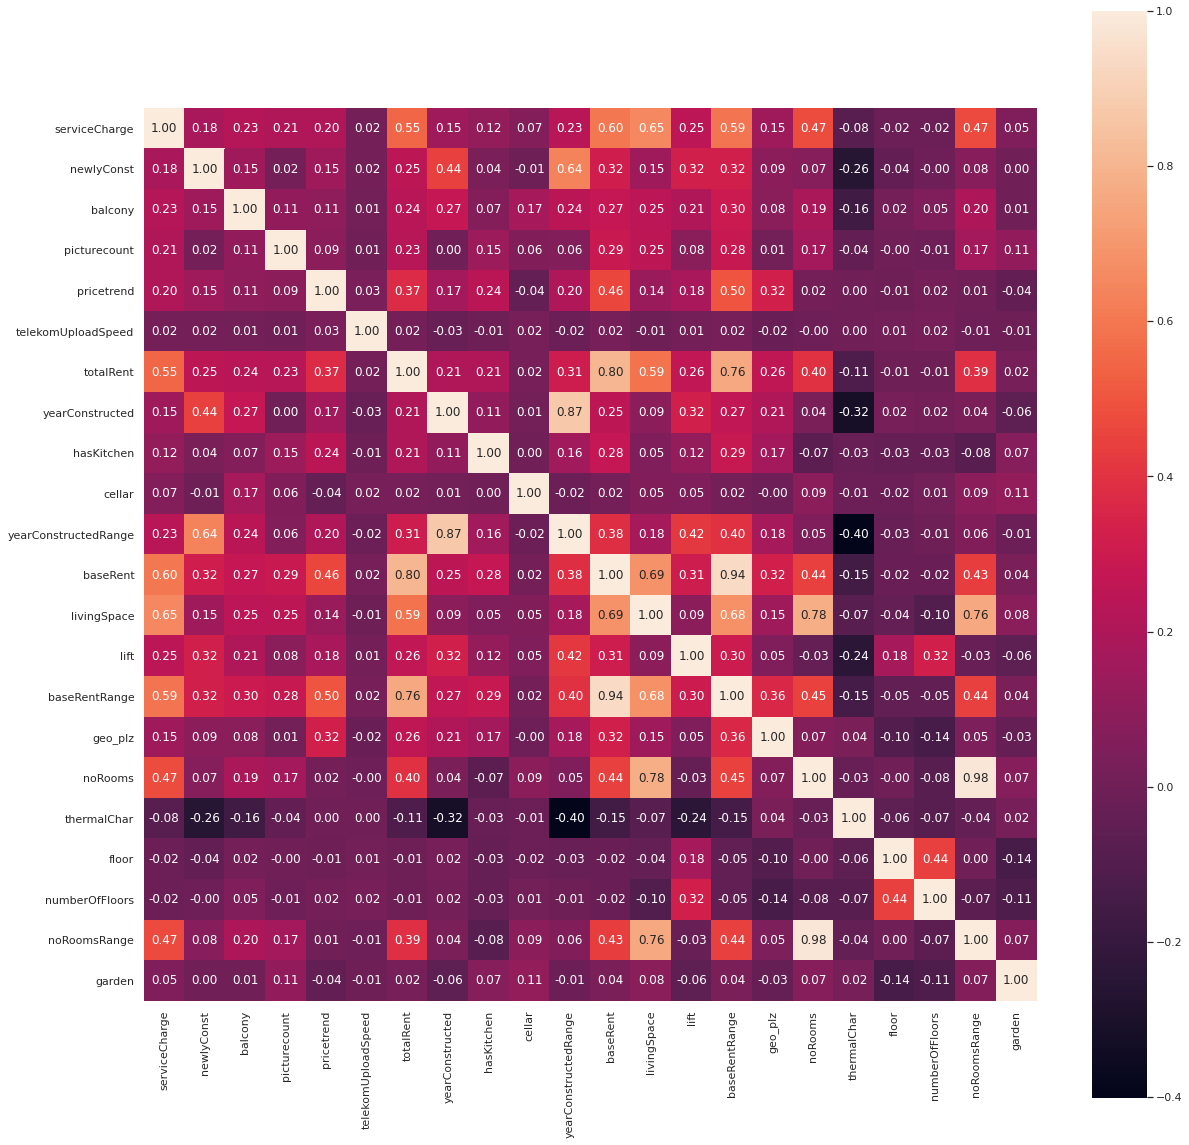

In [123]:
f, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(corr, square = True,fmt='.2f' ,annot = True)

# convert categorical data to dummies variables

In [124]:
columns = []
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        columns.append(cols)
        
columns

['telekomTvOffer',
 'newlyConst',
 'balcony',
 'hasKitchen',
 'cellar',
 'interiorQual',
 'petsAllowed',
 'lift',
 'garden',
 'regio1_edit',
 'heatingType_edit',
 'condition_edit',
 'typeOfFlat_edit']

In [125]:
dummies_feature = pd.get_dummies(df[columns])
dummies_feature.head()

,newlyConst,balcony,hasKitchen,cellar,lift,garden,telekomTvOffer_NONE,telekomTvOffer_ONE_YEAR_FREE,telekomTvOffer_ON_DEMAND,interiorQual_luxury,interiorQual_normal,interiorQual_simple,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,regio1_edit_Baden_Württemberg,regio1_edit_Bayern,regio1_edit_Berlin,regio1_edit_Brandenburg,regio1_edit_Hessen,regio1_edit_Mecklenburg_Vorpommern,regio1_edit_Niedersachsen,regio1_edit_Nordrhein_Westfalen,regio1_edit_Rheinland_Pfalz,regio1_edit_Sachsen,regio1_edit_Sachsen_Anhalt,regio1_edit_Schleswig_Holstein,regio1_edit_Thüringen,regio1_edit_other,heatingType_edit_central_heating,heatingType_edit_district_heating,heatingType_edit_floor_heating,heatingType_edit_gas_heating,heatingType_edit_oil_heating,heatingType_edit_other,heatingType_edit_self_contained_central_heating,condition_edit_first_time_use,condition_edit_fully_renovated,condition_edit_mint_condition,condition_edit_modernized,condition_edit_other,condition_edit_refurbished,condition_edit_well_kept,typeOfFlat_edit_apartment,typeOfFlat_edit_ground_floor,typeOfFlat_edit_half_loft,typeOfFlat_edit_maisonette,typeOfFlat_edit_other,typeOfFlat_edit_penthouse,typeOfFlat_edit_raised_ground_floor,typeOfFlat_edit_roof_storey,typeOfFlat_edit_terraced_flat
0,False,False,False,True,False,True,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,False,True,False,False,False,False,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,True,True,False,True,True,False,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,False,True,False,False,False,False,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,False,True,False,False,False,False,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [126]:
dummies_feature.shape

(243275, 53)

In [127]:
df = pd.concat([df, dummies_feature], axis=1)
df.head()

,serviceCharge,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,interiorQual,petsAllowed,lift,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,regio1_edit,heatingType_edit,condition_edit,typeOfFlat_edit,newlyConst,balcony,hasKitchen,cellar,lift,garden,telekomTvOffer_NONE,telekomTvOffer_ONE_YEAR_FREE,telekomTvOffer_ON_DEMAND,interiorQual_luxury,interiorQual_normal,interiorQual_simple,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,regio1_edit_Baden_Württemberg,regio1_edit_Bayern,regio1_edit_Berlin,regio1_edit_Brandenburg,regio1_edit_Hessen,regio1_edit_Mecklenburg_Vorpommern,regio1_edit_Niedersachsen,regio1_edit_Nordrhein_Westfalen,regio1_edit_Rheinland_Pfalz,regio1_edit_Sachsen,regio1_edit_Sachsen_Anhalt,regio1_edit_Schleswig_Holstein,regio1_edit_Thüringen,regio1_edit_other,heatingType_edit_central_heating,heatingType_edit_district_heating,heatingType_edit_floor_heating,heatingType_edit_gas_heating,heatingType_edit_oil_heating,heatingType_edit_other,heatingType_edit_self_contained_central_heating,condition_edit_first_time_use,condition_edit_fully_renovated,condition_edit_mint_condition,condition_edit_modernized,condition_edit_other,condition_edit_refurbished,condition_edit_well_kept,typeOfFlat_edit_apartment,typeOfFlat_edit_ground_floor,typeOfFlat_edit_half_loft,typeOfFlat_edit_maisonette,typeOfFlat_edit_other,typeOfFlat_edit_penthouse,typeOfFlat_edit_raised_ground_floor,typeOfFlat_edit_roof_storey,typeOfFlat_edit_terraced_flat
0,1.337161,ONE_YEAR_FREE,False,False,-0.610397,0.719832,-1.232900,0.117160,-0.085181,False,True,-0.713314,-0.023700,86.00,normal,negotiable,False,0.164648,0.258885,1.474688,1.915867,-0.787893,-0.368575,1.578835,True,Nordrhein_Westfalen,central_heating,well_kept,ground_floor,False,False,False,True,False,True,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,-0.159015,ONE_YEAR_FREE,False,True,-0.249169,0.097074,-1.232900,0.255076,-2.888230,False,False,-1.129473,0.521371,89.00,normal,no,False,0.634851,1.094462,0.421442,0.059192,0.041710,0.052273,0.491502,False,Rheinland_Pfalz,self_contained_central_heating,refurbished,ground_floor,False,True,False,False,False,False,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,1.471952,ONE_YEAR_FREE,True,True,-0.249169,-0.309073,-1.732078,1.156057,1.525081,False,True,2.199796,0.960086,83.80,sophisticated,negotiable,True,1.105054,-1.296679,0.421442,0.059192,0.686709,0.365045,0.491502,False,Sachsen,floor_heating,first_time_use,apartment,True,True,False,True,True,False,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,-1.181401,ONE_YEAR_FREE,False,True,-0.068555,-0.953493,0.737540,0.255076,-0.115001,False,False,-0.713314,-0.693737,58.15,normal,negotiable,False,-0.775758,-0.990337,0.421442,-0.740385,0.686709,0.052273,0.491502,False,Sachsen,district_heating,well_kept,other,False,True,False,False,False,False,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,-0.105098,ONE_YEAR_FREE,False,True,1.737585,-0.449871,0.001616,0.259444,-0.532476,False,False,-1.129473,0.428310,84.97,normal,negotiable,False,0.634851,-0.319641,0.421442,2.124692,-0.787893,0.052273,0.491502,False,other,self_contained_central_heating,refurbished,apartment,False,True,False,False,False,False,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [129]:
df = df.drop(columns=columns)
df.head()

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,telekomTvOffer_NONE,telekomTvOffer_ONE_YEAR_FREE,telekomTvOffer_ON_DEMAND,interiorQual_luxury,interiorQual_normal,interiorQual_simple,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,regio1_edit_Baden_Württemberg,regio1_edit_Bayern,regio1_edit_Berlin,regio1_edit_Brandenburg,regio1_edit_Hessen,regio1_edit_Mecklenburg_Vorpommern,regio1_edit_Niedersachsen,regio1_edit_Nordrhein_Westfalen,regio1_edit_Rheinland_Pfalz,regio1_edit_Sachsen,regio1_edit_Sachsen_Anhalt,regio1_edit_Schleswig_Holstein,regio1_edit_Thüringen,regio1_edit_other,heatingType_edit_central_heating,heatingType_edit_district_heating,heatingType_edit_floor_heating,heatingType_edit_gas_heating,heatingType_edit_oil_heating,heatingType_edit_other,heatingType_edit_self_contained_central_heating,condition_edit_first_time_use,condition_edit_fully_renovated,condition_edit_mint_condition,condition_edit_modernized,condition_edit_other,condition_edit_refurbished,condition_edit_well_kept,typeOfFlat_edit_apartment,typeOfFlat_edit_ground_floor,typeOfFlat_edit_half_loft,typeOfFlat_edit_maisonette,typeOfFlat_edit_other,typeOfFlat_edit_penthouse,typeOfFlat_edit_raised_ground_floor,typeOfFlat_edit_roof_storey,typeOfFlat_edit_terraced_flat
0,1.337161,-0.610397,0.719832,-1.232900,0.117160,-0.085181,-0.713314,-0.023700,86.00,0.164648,0.258885,1.474688,1.915867,-0.787893,-0.368575,1.578835,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,-0.159015,-0.249169,0.097074,-1.232900,0.255076,-2.888230,-1.129473,0.521371,89.00,0.634851,1.094462,0.421442,0.059192,0.041710,0.052273,0.491502,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,1.471952,-0.249169,-0.309073,-1.732078,1.156057,1.525081,2.199796,0.960086,83.80,1.105054,-1.296679,0.421442,0.059192,0.686709,0.365045,0.491502,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,-1.181401,-0.068555,-0.953493,0.737540,0.255076,-0.115001,-0.713314,-0.693737,58.15,-0.775758,-0.990337,0.421442,-0.740385,0.686709,0.052273,0.491502,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,-0.105098,1.737585,-0.449871,0.001616,0.259444,-0.532476,-1.129473,0.428310,84.97,0.634851,-0.319641,0.421442,2.124692,-0.787893,0.052273,0.491502,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243275 entries, 0 to 256411
Data columns (total 63 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   serviceCharge                                    243275 non-null  float64
 1   picturecount                                     243275 non-null  float64
 2   pricetrend                                       243275 non-null  float64
 3   telekomUploadSpeed                               243275 non-null  float64
 4   totalRent                                        243275 non-null  float64
 5   yearConstructed                                  243275 non-null  float64
 6   yearConstructedRange                             243275 non-null  float64
 7   baseRent                                         243275 non-null  float64
 8   livingSpace                                      243275 non-null  float64
 9   baseRentRange  

# split features and target

In [131]:
y = df['livingSpace'].values
x = df.drop(columns = ['livingSpace']).values

print(x.shape)
print(y.shape)

(243275, 62)
(243275,)


In [132]:
train_size = int(0.8 * x.shape[0])
train_size

194620

In [133]:
x_train = x[:train_size]
y_train = y[:train_size]

print(x_train.shape)
print(y_train.shape)

x_test = x[train_size:]
y_test = y[train_size:]

print(x_test.shape)
print(y_test.shape)

(194620, 62)
(194620,)
(48655, 62)
(48655,)


# PCA

In [134]:
from sklearn.decomposition import PCA
pca = PCA(0.90)
x_pca = pca.fit_transform(x)
x_pca.shape

(243275, 18)

In [135]:
x_pca_train = x_pca[:train_size]
print(x_pca_train.shape)
x_pca_test = x_pca[train_size:]
print(x_pca_test.shape)

(194620, 18)
(48655, 18)


In [143]:
y_test

array([55.        , 76.54      , 77.3       , ..., 76.6       ,
       72.85      , 74.38939183])

# Regression

## All Features

\begin{equation}
\hat{y} = w_1 * x_1 + w_2 * x_2 + \cdots + w_{61} * x_{61} + b
\end{equation}

\begin{align}
&error^{i} = \frac{1}{2}({y_{train}}^{i} - \hat{y}^{i})\\
&\mbox{MSE} = \frac{1}{N} \sum_{i = 1}{N} (error^{i})^2\\
&\mbox{MSE} = \frac{1}{N} \big((error^{0})^2 + (error^{1})^2 + \cdots + (error^{N})^2 \big)\\
&\mbox{MSE} = \frac{1}{N} \big((y_{train} ^{0} - (w_1 * x_1 ^{0} + \cdots + w_{61} * x_{61} ^{0} + b))^2 + \cdots + ((y_{train} ^{N} - (w_1 * x_1 ^{N} + \cdots + w_{61} * x_{61} ^{N} + b))^2 \big)\\
\end{align}

\begin{align}
&\frac{\partial\mbox{MSE}}{\partial w_{1}} = \frac{-2}{2N}\big(error^{0}*{x_1}^{0} + error^{1}*{x_1}^{1} + \cdots + error^{N}*{x_1}^{N}\big) = \frac{-2}{2N} \big( \sum_{i = 1}^{N} error^{i} * x_{1} ^{i} \big) \\
&\frac{\partial\mbox{MSE}}{\partial w_{2}} = \frac{-2}{2N}\big(error^{0}*{x_2}^{0} + error^{1}*{x_2}^{1} + \cdots + error^{N}*{x_2}^{N}\big) = \frac{-2}{2N} \big( \sum_{i = 1}^{N} error^{i} * x_{2} ^{i} \big) \\
&\vdots\\
&\frac{\partial\mbox{MSE}}{\partial w_{61}} = \frac{-2}{2N}\big(error^{0}*{x_{61}}^{0} + error^{1}*{x_{61}}^{1} + \cdots + error^{N}*{x_{61}}^{N}\big) = \frac{-2}{2N} \big( \sum_{i = 1}^{N} error^{i} * x_{61} ^{i} \big) \\
&\frac{\partial\mbox{MSE}}{\partial b} = \frac{-2}{2N} \big( \sum_{i = 1}^{N} error^{i} \big)
\end{align}


In [164]:
x_train[:,0].shape

(194620,)

In [165]:
# Initializes parameters "w" and "b" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(61)
n = x_train.shape[0]

# Sets learning rate
lr = 0.001

# Defines number of epochs
n_epochs = 500

test_error =  y_test  - np.sum((w * x_test) + b , axis = 1)
test_mse = (test_error**2).mean()           
print('init MSE : ',test_mse)
              
for epoch in range(n_epochs):
    error = y_train - np.sum((w * x_train) + b , axis = 1)
    
    if epoch % 100 == 0:    
        print('epoch {} , MSE : {}'.format(epoch,(error**2).mean()))
    
    w_grad = [0] * x_train.shape[1]
    b_grad = 0
    
    for i in range(x_train.shape[1]):
        w_grad[i] = -1 * (x_train[:,i] * error).mean()
        w[i] = w[i] - (lr * w_grad[i])
        
    b_grad = -1 * error.mean()
    b = b - (lr*b_grad)
              

test_error = y_test - np.sum((w * x_test) + b , axis = 1)
test_mse = (test_error**2).mean() 
print('Final MSE : ',test_mse)

ValueError: ignored

In [139]:
y_pred = np.sum((w * x_test) + b , axis = 1)
temp = pd.DataFrame({'test':y_test,'pred':y_pred})
temp.head()

ValueError: ignored

In [ ]:
temp['upper_range'] = temp['test'] * 1.2
temp['lower_range'] = temp['test'] * 0.8

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

In [145]:
# Initializes parameters "w" and "b" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(61)
n = x_train.shape[0]

# Sets learning rate
lr = 0.01

# Defines number of epochs
n_epochs = 500

test_error =  y_test - np.sum((w * x_test) + b , axis = 1)
test_mse = (test_error**2).mean()           
print('init MSE : ',test_mse)
              
for epoch in range(n_epochs):
    error = y_train - np.sum((w * x_train) + b , axis = 1)
    
    if epoch % 100 == 0:    
        print('epoch {} , MSE : {}'.format(epoch,(error**2).mean()))
    
    w_grad = [0] * x_train.shape[1]
    b_grad = 0
    
    for i in range(x_train.shape[1]):
        w_grad[i] = -1 * (x_train[:,i] * error).mean()
        w[i] = w[i] - (lr * w_grad[i])
        
    b_grad = -1 * error.mean()
    b = b - (lr*b_grad)
              

test_error = y_test - np.sum((w * x_test) + b , axis = 1)
test_mse = (test_error**2).mean() 
print('Final MSE : ',test_mse)

ValueError: ignored

In [146]:
y_pred = np.sum((w * x_test) + b , axis = 1)
temp = pd.DataFrame({'test':y_test,'pred':y_pred})
temp.head()

ValueError: ignored

In [147]:
temp['upper_range'] = temp['test'] * 1.2
temp['lower_range'] = temp['test'] * 0.8

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

NameError: ignored

## use skitlearn linear model

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
Linear = LinearRegression()

In [149]:
Linear.fit(x_train,y_train)
print(Linear.coef_)
print(Linear.intercept_)

[ 5.53305505e+00  3.90683250e-01 -2.18039795e+00 -2.79649066e-01
  1.67919615e-01 -1.33070914e+00  7.46000450e-01  7.30087156e+00
  5.59755149e+00  7.63329077e-01  1.36546085e+01 -1.11223177e-02
 -1.73826855e-01 -9.92032927e-01  1.10198783e-01 -5.60152036e+10
 -5.60152036e+10 -5.60152036e+10  7.70371176e+12  7.70371176e+12
  7.70371176e+12  7.70371176e+12 -1.91887446e+12 -1.91887446e+12
 -1.91887446e+12  3.94543546e+11  3.94543546e+11  3.94543546e+11
  3.94543546e+11  3.94543546e+11  3.94543546e+11  3.94543546e+11
  3.94543546e+11  3.94543546e+11  3.94543546e+11  3.94543546e+11
  3.94543546e+11  3.94543546e+11  3.94543546e+11 -3.26327689e+11
 -3.26327689e+11 -3.26327689e+11 -3.26327689e+11 -3.26327689e+11
 -3.26327689e+11 -3.26327689e+11  2.95921313e+10  2.95921313e+10
  2.95921313e+10  2.95921313e+10  2.95921313e+10  2.95921313e+10
  2.95921313e+10 -1.04981851e+12 -1.04981851e+12 -1.04981851e+12
 -1.04981851e+12 -1.04981851e+12 -1.04981851e+12 -1.04981851e+12
 -1.04981851e+12 -1.04981

In [150]:
y_pred = Linear.predict(x_test)

In [151]:
mean_squared_error(y_pred,y_test)

167.3779581725475

In [152]:
temp = pd.DataFrame({'test':y_test,'pred':y_pred})
temp.head()

,test,pred
0,55.00,47.142578
1,76.54,81.141602
2,77.30,84.482422
3,137.00,122.848633
4,60.92,61.447266


In [153]:
temp['upper_range'] = temp['test'] * 1.2
temp['lower_range'] = temp['test'] * 0.8

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

78.57157537765903

## Use PCA features

In [154]:
x_pca_train.shape

(194620, 18)

In [155]:
# Initializes parameters "w" and "b" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(x_pca_train.shape[1])
n = x_pca_train.shape[0]

# Sets learning rate
lr = 0.01

# Defines number of epochs
n_epochs = 500

test_error =  y_test - np.sum((w * x_pca_test) + b , axis = 1)
test_mse = (test_error**2).mean()           
print('init MSE : ',test_mse)
              
for epoch in range(n_epochs):
    error = y_train - np.sum((w * x_pca_train) + b , axis = 1)
    
    if epoch % 100 == 0:    
        print('epoch {} , MSE : {}'.format(epoch,(error**2).mean()))
    
    w_grad = [0] * x_pca_train.shape[1]
    b_grad = 0
    
    for i in range(x_pca_train.shape[1]):
        w_grad[i] = -1 * (x_pca_train[:,i] * error).mean()
        w[i] = w[i] - (lr * w_grad[i])
        
    b_grad = -1 * error.mean()
    b = b - (lr*b_grad)
              

test_error = y_test - np.sum((w * x_pca_test) + b , axis = 1)
test_mse = (test_error**2).mean() 
print('Final MSE : ',test_mse)

init MSE :  4812.057076196734
epoch 0 , MSE : 4749.5555216240955
epoch 100 , MSE : 183.26071128258323
epoch 200 , MSE : 178.979690825115
epoch 300 , MSE : 178.25670455389573
epoch 400 , MSE : 177.92000993534145
Final MSE :  176.89425844025828


In [156]:
y_pred = np.sum((w * x_pca_test) + b , axis = 1)
temp = pd.DataFrame({'test':y_test,'pred':y_pred})
temp.head()

,test,pred
0,55.00,50.509721
1,76.54,80.924018
2,77.30,90.430060
3,137.00,123.201422
4,60.92,61.575224


In [157]:
temp['upper_range'] = temp['test'] * 1.2
temp['lower_range'] = temp['test'] * 0.8

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

77.59325865789744

## use just noRooms feature

In [158]:
df.head()

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,telekomTvOffer_NONE,telekomTvOffer_ONE_YEAR_FREE,telekomTvOffer_ON_DEMAND,interiorQual_luxury,interiorQual_normal,interiorQual_simple,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,regio1_edit_Baden_Württemberg,regio1_edit_Bayern,regio1_edit_Berlin,regio1_edit_Brandenburg,regio1_edit_Hessen,regio1_edit_Mecklenburg_Vorpommern,regio1_edit_Niedersachsen,regio1_edit_Nordrhein_Westfalen,regio1_edit_Rheinland_Pfalz,regio1_edit_Sachsen,regio1_edit_Sachsen_Anhalt,regio1_edit_Schleswig_Holstein,regio1_edit_Thüringen,regio1_edit_other,heatingType_edit_central_heating,heatingType_edit_district_heating,heatingType_edit_floor_heating,heatingType_edit_gas_heating,heatingType_edit_oil_heating,heatingType_edit_other,heatingType_edit_self_contained_central_heating,condition_edit_first_time_use,condition_edit_fully_renovated,condition_edit_mint_condition,condition_edit_modernized,condition_edit_other,condition_edit_refurbished,condition_edit_well_kept,typeOfFlat_edit_apartment,typeOfFlat_edit_ground_floor,typeOfFlat_edit_half_loft,typeOfFlat_edit_maisonette,typeOfFlat_edit_other,typeOfFlat_edit_penthouse,typeOfFlat_edit_raised_ground_floor,typeOfFlat_edit_roof_storey,typeOfFlat_edit_terraced_flat
0,1.337161,-0.610397,0.719832,-1.232900,0.117160,-0.085181,-0.713314,-0.023700,86.00,0.164648,0.258885,1.474688,1.915867,-0.787893,-0.368575,1.578835,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,-0.159015,-0.249169,0.097074,-1.232900,0.255076,-2.888230,-1.129473,0.521371,89.00,0.634851,1.094462,0.421442,0.059192,0.041710,0.052273,0.491502,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,1.471952,-0.249169,-0.309073,-1.732078,1.156057,1.525081,2.199796,0.960086,83.80,1.105054,-1.296679,0.421442,0.059192,0.686709,0.365045,0.491502,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,-1.181401,-0.068555,-0.953493,0.737540,0.255076,-0.115001,-0.713314,-0.693737,58.15,-0.775758,-0.990337,0.421442,-0.740385,0.686709,0.052273,0.491502,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,-0.105098,1.737585,-0.449871,0.001616,0.259444,-0.532476,-1.129473,0.428310,84.97,0.634851,-0.319641,0.421442,2.124692,-0.787893,0.052273,0.491502,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [159]:
X = df['noRooms'].values
X.shape

(243275,)

In [160]:
X_train = X[:train_size]
print(X_train.shape)
X_test = X[train_size:]
print(X_test.shape)

(194620,)
(48655,)


In [161]:
# Initializes parameters "w" and "b" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)
n = X_train.shape[0]

# Sets learning rate
lr = 0.1

# Defines number of epochs
n_epochs = 500

test_error =  y_test - ((w * X_test) + b)
test_mse = (test_error**2).mean()           
print('init MSE : ',test_mse)
print('init learning rate : ',lr)
              
for epoch in range(n_epochs):
    error = y_train - ((w * X_train) + b)
    
    if epoch % 100 == 0:    
        print('epoch {} , MSE : {}'.format(epoch,(error**2).mean()))
     
    # adoptive learning rate
    if epoch % 200 == 0:
        lr = lr * 0.1
        
    
    w_grad = 0 
    b_grad = 0
    
    w_grad = -1 * (X_train * error).mean()
    w = w - (lr * w_grad)
        
    b_grad = -1 * error.mean()
    b = b - (lr*b_grad)
              

test_error = y_test - ((w * X_test) + b)
test_mse = (test_error**2).mean() 
print('Final MSE : ',test_mse)
print('Final learning rate : ',lr)

init MSE :  5963.982030614265
init learning rate :  0.1
epoch 0 , MSE : 5911.304141907742
epoch 100 , MSE : 1079.988837048709
epoch 200 , MSE : 432.43269943809906
epoch 300 , MSE : 414.25950671327365
epoch 400 , MSE : 399.3814548832774
Final MSE :  397.8511652102212
Final learning rate :  0.00010000000000000003


In [162]:
y_pred = (w * X_test) + b
temp = pd.DataFrame({'test':y_test,'pred':y_pred})
temp.head()

,test,pred
0,55.00,51.394491
1,76.54,72.385152
2,77.30,72.385152
3,137.00,93.375813
4,60.92,51.394491


In [163]:
temp['upper_range'] = temp['test'] * 1.2
temp['lower_range'] = temp['test'] * 0.8

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

61.960744013975955